### DEPENDENCIES

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf

import pickle
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from time import time as runtime
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , classification_report
import random
from sklearn.svm import SVC
 
import keras as k
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import SGD, Adam
from keras.regularizers import l2
import h5py
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator

### Forming The Dataset 

In [ ]:
 
# unpickled data batch
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='latin1')
    return dict

def load_data(file):
    data_dic = unpickle(file)
    labels = data_dic['labels']
    data = data_dic['data']
    return labels, data

In [ ]:
 # load label description
label_desc = unpickle("batches.meta")
label_names = label_desc['label_names']
# load test data
test_labels, test_data = load_data("test_batch")
# load train data
train_labels = []
train_data = np.zeros((50000, 3072))
for i in range(5):
    filename = "data_batch_" + str(i+1)
    labels, data = load_data(filename)
    train_labels.extend(labels)
    train_data[i*10000:(i+1)*10000, :] = data

In [ ]:
label_desc = unpickle("batches.meta")
label_names = label_desc['label_names']
label_names

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [ ]:
print(len(train_data))
print(len(train_data[0]))
print(train_data)
print(len(train_labels))
print(train_labels)


50000
3072
[[ 59.  43.  50. ... 140.  84.  72.]
 [154. 126. 105. ... 139. 142. 144.]
 [255. 253. 253. ...  83.  83.  84.]
 ...
 [ 35.  40.  42. ...  77.  66.  50.]
 [189. 186. 185. ... 169. 171. 171.]
 [229. 236. 234. ... 173. 162. 161.]]
50000
[6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6, 4, 3, 6, 6, 2, 6, 3, 5, 4, 0, 0, 9, 1, 3, 4, 0, 3, 7, 3, 3, 5, 2, 2, 7, 1, 1, 1, 2, 2, 0, 9, 5, 7, 9, 2, 2, 5, 2, 4, 3, 1, 1, 8, 2, 1, 1, 4, 9, 7, 8, 5, 9, 6, 7, 3, 1, 9, 0, 3, 1, 3, 5, 4, 5, 7, 7, 4, 7, 9, 4, 2, 3, 8, 0, 1, 6, 1, 1, 4, 1, 8, 3, 9, 6, 6, 1, 8, 5, 2, 9, 9, 8, 1, 7, 7, 0, 0, 6, 9, 1, 2, 2, 9, 2, 6, 6, 1, 9, 5, 0, 4, 7, 6, 7, 1, 8, 1, 1, 2, 8, 1, 3, 3, 6, 2, 4, 9, 9, 5, 4, 3, 6, 7, 4, 6, 8, 5, 5, 4, 3, 1, 8, 4, 7, 6, 0, 9, 5, 1, 3, 8, 2, 7, 5, 3, 4, 1, 5, 7, 0, 4, 7, 5, 5, 1, 0, 9, 6, 9, 0, 8, 7, 8, 8, 2, 5, 2, 3, 5, 0, 6, 1, 9, 3, 6, 9, 1, 3, 9, 6, 6, 7, 1, 0, 9, 5, 8, 5, 2, 9, 0, 8, 8, 0, 6, 9, 1, 1, 6, 3, 7, 6, 6, 0, 6, 6, 1, 7, 1, 5, 8, 3, 6, 6, 8, 6, 8, 4, 6, 6, 1, 3

In [ ]:
print(len(test_data))
print(len(test_data[0]))
print(test_data)
print(len(test_labels))
print(test_labels)

10000
3072
[[158 159 165 ... 124 129 110]
 [235 231 232 ... 178 191 199]
 [158 158 139 ...   8   3   7]
 ...
 [ 20  19  15 ...  50  53  47]
 [ 25  15  23 ...  80  81  80]
 [ 73  98  99 ...  94  58  26]]
10000
[3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 7, 8, 6, 7, 0, 4, 9, 5, 2, 4, 0, 9, 6, 6, 5, 4, 5, 9, 2, 4, 1, 9, 5, 4, 6, 5, 6, 0, 9, 3, 9, 7, 6, 9, 8, 0, 3, 8, 8, 7, 7, 4, 6, 7, 3, 6, 3, 6, 2, 1, 2, 3, 7, 2, 6, 8, 8, 0, 2, 9, 3, 3, 8, 8, 1, 1, 7, 2, 5, 2, 7, 8, 9, 0, 3, 8, 6, 4, 6, 6, 0, 0, 7, 4, 5, 6, 3, 1, 1, 3, 6, 8, 7, 4, 0, 6, 2, 1, 3, 0, 4, 2, 7, 8, 3, 1, 2, 8, 0, 8, 3, 5, 2, 4, 1, 8, 9, 1, 2, 9, 7, 2, 9, 6, 5, 6, 3, 8, 7, 6, 2, 5, 2, 8, 9, 6, 0, 0, 5, 2, 9, 5, 4, 2, 1, 6, 6, 8, 4, 8, 4, 5, 0, 9, 9, 9, 8, 9, 9, 3, 7, 5, 0, 0, 5, 2, 2, 3, 8, 6, 3, 4, 0, 5, 8, 0, 1, 7, 2, 8, 8, 7, 8, 5, 1, 8, 7, 1, 3, 0, 5, 7, 9, 7, 4, 5, 9, 8, 0, 7, 9, 8, 2, 7, 6, 9, 4, 3, 9, 6, 4, 7, 6, 5, 1, 5, 8, 8, 0, 4, 0, 5, 5, 1, 1, 8, 9, 0, 3, 1, 9, 2, 2, 5, 3, 9, 9, 4, 0, 3, 0, 0, 9, 8, 1, 5, 7

In [ ]:
arr=[]
for i in range(1,3073):
    arr.append(str(i))

X_train = pd.DataFrame(train_data, columns = arr)
X_test = pd.DataFrame(test_data, columns = arr)
print(X_train)
print(X_train.info)


           1      2      3      4      5  ...   3068   3069   3070   3071   3072
0       59.0   43.0   50.0   68.0   98.0  ...   57.0  104.0  140.0   84.0   72.0
1      154.0  126.0  105.0  102.0  125.0  ...  133.0  136.0  139.0  142.0  144.0
2      255.0  253.0  253.0  253.0  253.0  ...   72.0   79.0   83.0   83.0   84.0
3       28.0   37.0   38.0   42.0   44.0  ...   48.0   38.0   28.0   37.0   46.0
4      170.0  168.0  177.0  183.0  181.0  ...   79.0   78.0   82.0   78.0   80.0
...      ...    ...    ...    ...    ...  ...    ...    ...    ...    ...    ...
49995  145.0  151.0  156.0  155.0  153.0  ...   59.0   57.0   56.0   53.0   54.0
49996  255.0  254.0  255.0  254.0  254.0  ...   76.0   82.0   79.0   81.0   76.0
49997   35.0   40.0   42.0   39.0   43.0  ...   93.0   87.0   77.0   66.0   50.0
49998  189.0  186.0  185.0  184.0  182.0  ...  169.0  165.0  169.0  171.0  171.0
49999  229.0  236.0  234.0  231.0  236.0  ...  171.0  174.0  173.0  162.0  161.0

[50000 rows x 3072 columns]

### PREPROCESSING

In [ ]:
#convert integers to float; normalise and center the mean
X_train=X_train.astype("float32")  
X_test=X_test.astype("float32")
mean=np.mean(X_train)
std=np.std(X_train)
X_train=(X_train-mean)/std
mean=np.mean(X_test)
std=np.std(X_test)
X_test=(X_test-mean)/std


In [ ]:

# labels one hot encoding
num_classes=10
y_train = k.utils.to_categorical(train_labels, num_classes)
y_test = k.utils.to_categorical(test_labels, num_classes)

***creating augemented dataset ***

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=15,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
    #zoom_range=0.3
    )
X_train_augmented=X_train
datagen.fit(X_train_augmented.to_numpy())
print(X_train.to_numpy)

**creating PCA reduced dataset** 

  



In [ ]:
from sklearn.decomposition import PCA
# Make an instance of the Model
#choose the minimum number of principal components such that 95% of the variance is retained
pca = PCA(n_components=221)
X_train_pca = pca.fit_transform(X_train)



In [ ]:
pca.get_covariance() 

array([[0.9951546 , 0.9449078 , 0.9339112 , ..., 0.3013595 , 0.31219316,
        0.3268623 ],
       [0.9449078 , 1.0097705 , 0.9508358 , ..., 0.29656956, 0.30643833,
        0.31818616],
       [0.9339112 , 0.9508358 , 1.0089906 , ..., 0.29237962, 0.30176473,
        0.31217104],
       ...,
       [0.30135947, 0.29656947, 0.29237965, ..., 1.0087752 , 0.94887245,
        0.927766  ],
       [0.31219298, 0.30643812, 0.3017647 , ..., 0.94887245, 1.0084401 ,
        0.94236225],
       [0.32686222, 0.3181863 , 0.31217116, ..., 0.927766  , 0.94236225,
        0.9945822 ]], dtype=float32)

In [ ]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([2.6920176e-01, 1.1370507e-01, 7.1649626e-02, 3.8664155e-02,
       3.5851497e-02, 2.9599959e-02, 2.8092911e-02, 2.1520279e-02,
       2.1055976e-02, 1.5008853e-02, 1.3127338e-02, 1.1301313e-02,
       1.1099668e-02, 1.0517749e-02, 9.4624301e-03, 8.2990527e-03,
       7.7003543e-03, 7.4211485e-03, 6.6060373e-03, 6.4537218e-03,
       6.0737887e-03, 5.9937518e-03, 5.2077449e-03, 5.1043034e-03,
       5.0462200e-03, 4.8849708e-03, 4.6713813e-03, 4.5944774e-03,
       4.1853925e-03, 4.0482087e-03, 3.8049407e-03, 3.4552165e-03,
       3.3426492e-03, 3.1916341e-03, 3.1516007e-03, 2.9646321e-03,
       2.7417527e-03, 2.7231292e-03, 2.6629332e-03, 2.6038152e-03,
       2.5387527e-03, 2.3546650e-03, 2.3489699e-03, 2.2749777e-03,
       2.1743511e-03, 2.1353676e-03, 1.9989363e-03, 1.9656599e-03,
       1.9157300e-03, 1.8750969e-03, 1.8369106e-03, 1.8008446e-03,
       1.7505601e-03, 1.7385028e-03, 1.6631460e-03, 1.6451875e-03,
       1.6383178e-03, 1.5975503e-03, 1.5922633e-03, 1.5580303e

In [ ]:
pca.n_components_

221

In [ ]:
pca2=PCA(n_components=221)
X_test_pca = pca2.fit_transform(X_test)

### Training classifiers

> Indented block



### Logistic regression

Without PCA

In [ ]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, train_labels)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred_train_lr=logisticRegr.predict(X_train)
y_pred_test_lr=logisticRegr.predict(X_test)


In [ ]:
print("Training Accuracy :",accuracy_score(train_labels, y_pred_train_lr))

print("Testing Accuracy :",accuracy_score(test_labels, y_pred_test_lr))

print(classification_report(test_labels,y_pred_test_lr))

Training Accuracy : 0.46326
Testing Accuracy : 0.3971
              precision    recall  f1-score   support

           0       0.46      0.48      0.47      1000
           1       0.47      0.47      0.47      1000
           2       0.30      0.28      0.29      1000
           3       0.27      0.27      0.27      1000
           4       0.34      0.31      0.32      1000
           5       0.33      0.33      0.33      1000
           6       0.40      0.43      0.42      1000
           7       0.45      0.43      0.44      1000
           8       0.50      0.52      0.51      1000
           9       0.44      0.46      0.45      1000

    accuracy                           0.40     10000
   macro avg       0.40      0.40      0.40     10000
weighted avg       0.40      0.40      0.40     10000



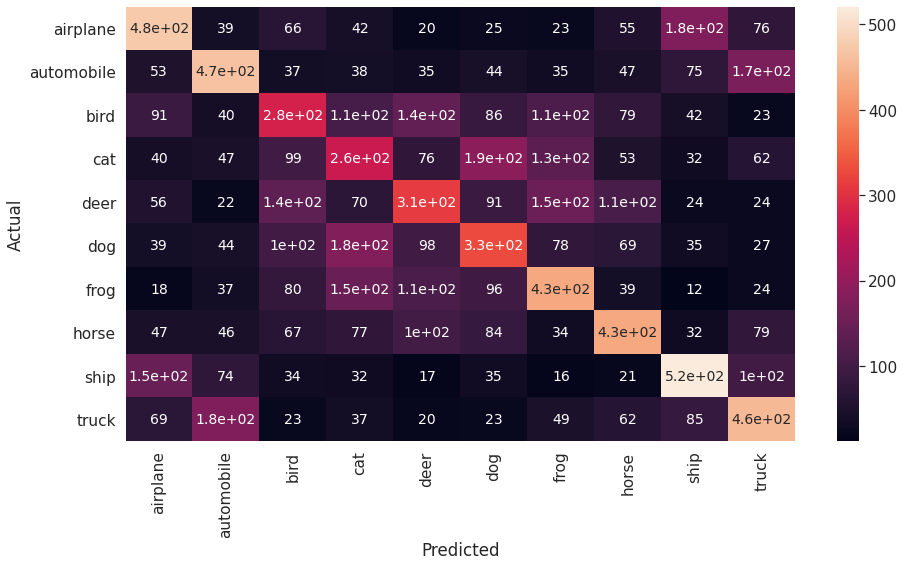

In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


 
 
 
array = confusion_matrix(test_labels,y_pred_test_lr)

df_cm = pd.DataFrame(array, range(10), range(10))
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, xticklabels=label_names, yticklabels=label_names,  annot_kws={"size": 14}) # font size
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.show()

With PCA

In [ ]:
logisticRegr_pca = LogisticRegression()
logisticRegr_pca.fit(X_train_pca, train_labels)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred_train_lr_pca=logisticRegr_pca.predict(X_train_pca)
y_pred_test_lr_pca=logisticRegr_pca.predict(X_test_pca)


In [ ]:
print("Training Accuracy :",accuracy_score(train_labels, y_pred_train_lr_pca))

print("Testing Accuracy :",accuracy_score(test_labels, y_pred_test_lr_pca))

print(classification_report(test_labels,y_pred_test_lr_pca))

Training Accuracy : 0.42762
Testing Accuracy : 0.2251
              precision    recall  f1-score   support

           0       0.35      0.36      0.36      1000
           1       0.19      0.20      0.19      1000
           2       0.18      0.16      0.17      1000
           3       0.19      0.15      0.17      1000
           4       0.24      0.24      0.24      1000
           5       0.27      0.24      0.25      1000
           6       0.17      0.18      0.17      1000
           7       0.10      0.11      0.10      1000
           8       0.32      0.37      0.34      1000
           9       0.23      0.25      0.24      1000

    accuracy                           0.23     10000
   macro avg       0.22      0.23      0.22     10000
weighted avg       0.22      0.23      0.22     10000



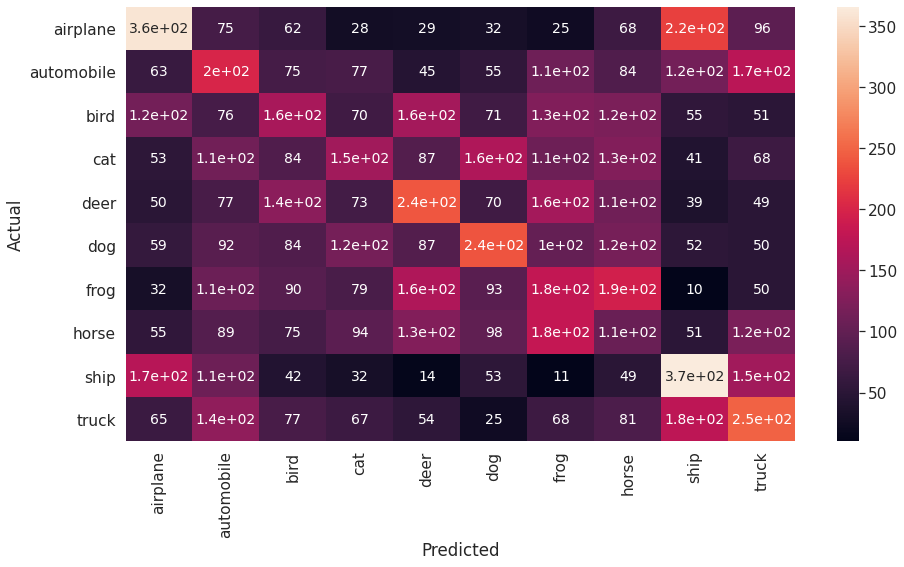

In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

array = confusion_matrix(test_labels,y_pred_test_lr_pca)

df_cm = pd.DataFrame(array, range(10), range(10))
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm,xticklabels=label_names, yticklabels=label_names, annot=True, annot_kws={"size": 14}) # font size
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import BernoulliNB

**Gaussian Naive Bayes ** 

Without PCA

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,train_labels)


GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_pred_train_gnb=gnb.predict(X_train)
y_pred_test_gnb=gnb.predict(X_test)

In [ ]:


print("Training Accuracy :",accuracy_score(train_labels, y_pred_train_gnb))

print("Testing Accuracy :",accuracy_score(test_labels, y_pred_test_gnb))

print(classification_report(test_labels,y_pred_test_gnb))

Training Accuracy : 0.28472
Testing Accuracy : 0.2955
              precision    recall  f1-score   support

           0       0.28      0.49      0.35      1000
           1       0.40      0.17      0.23      1000
           2       0.17      0.07      0.10      1000
           3       0.24      0.08      0.12      1000
           4       0.24      0.41      0.30      1000
           5       0.32      0.26      0.29      1000
           6       0.25      0.47      0.33      1000
           7       0.42      0.13      0.20      1000
           8       0.39      0.47      0.42      1000
           9       0.38      0.41      0.39      1000

    accuracy                           0.30     10000
   macro avg       0.31      0.30      0.27     10000
weighted avg       0.31      0.30      0.27     10000



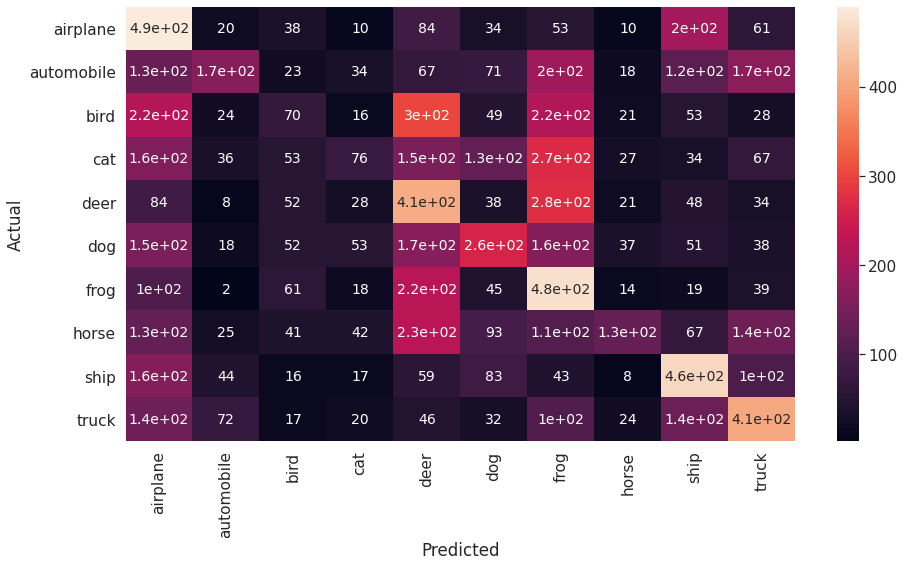

In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

array = confusion_matrix(test_labels,y_pred_test_gnb)

df_cm = pd.DataFrame(array, range(10), range(10))
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm,xticklabels=label_names, yticklabels=label_names, annot=True, annot_kws={"size": 14}) # font size
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.show()

With PCA

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb_pca = GaussianNB()
gnb_pca.fit(X_train_pca,train_labels)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_pred_train_gnb_pca=gnb_pca.predict(X_train_pca)
y_pred_test_gnb_pca=gnb_pca.predict(X_test_pca)

In [ ]:

print("Training Accuracy :",accuracy_score(train_labels, y_pred_train_gnb_pca))

print("Testing Accuracy :",accuracy_score(test_labels, y_pred_test_gnb_pca))

print(classification_report(test_labels,y_pred_test_gnb_pca))

Training Accuracy : 0.31382
Testing Accuracy : 0.2309
              precision    recall  f1-score   support

           0       0.26      0.13      0.17      1000
           1       0.27      0.34      0.30      1000
           2       0.14      0.08      0.10      1000
           3       0.21      0.13      0.16      1000
           4       0.20      0.61      0.30      1000
           5       0.25      0.15      0.19      1000
           6       0.33      0.17      0.23      1000
           7       0.17      0.10      0.12      1000
           8       0.30      0.21      0.25      1000
           9       0.24      0.39      0.30      1000

    accuracy                           0.23     10000
   macro avg       0.24      0.23      0.21     10000
weighted avg       0.24      0.23      0.21     10000



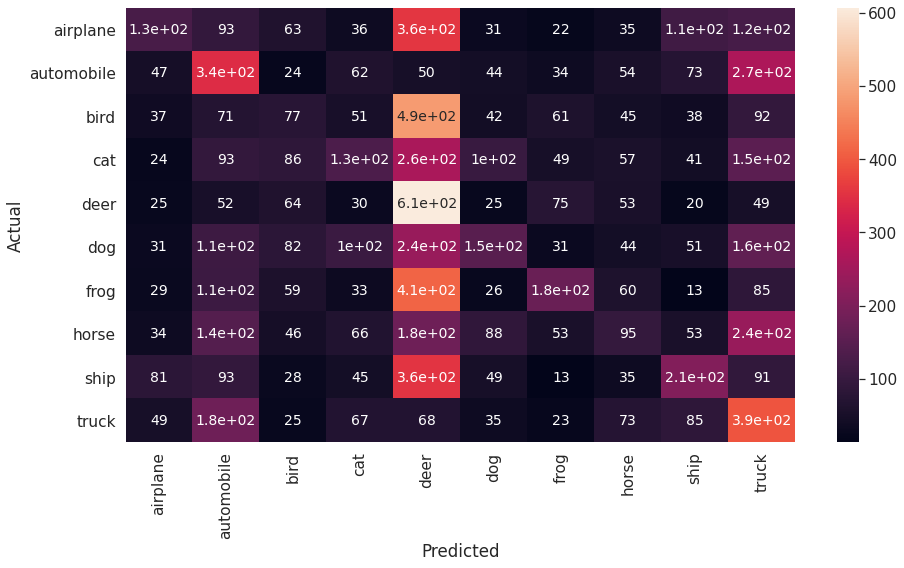

In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

array = confusion_matrix(test_labels,y_pred_test_gnb_pca)

df_cm = pd.DataFrame(array, range(10), range(10))
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm,xticklabels=label_names, yticklabels=label_names, annot=True, annot_kws={"size": 14}) # font size
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.show()

### Random Forest

Without PCA

In [ ]:
 
from sklearn.metrics import accuracy_score
# rf = grid_search.best_estimator_
rf=RandomForestClassifier(random_state=42)
rf.fit(X_train,train_labels)

 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
y_pred_test_rf=rf.predict(X_test)
y_pred_train_rf=rf.predict(X_train)

In [ ]:

print("Training Accuracy :",accuracy_score(train_labels, y_pred_train_rf))
print("Testing Accuracy:",accuracy_score(test_labels, y_pred_test_rf))
print(classification_report(test_labels,y_pred_test_rf))

Training Accuracy : 1.0
Testing Accuracy: 0.4705
              precision    recall  f1-score   support

           0       0.56      0.58      0.57      1000
           1       0.52      0.54      0.53      1000
           2       0.37      0.31      0.34      1000
           3       0.34      0.29      0.31      1000
           4       0.40      0.39      0.39      1000
           5       0.44      0.39      0.41      1000
           6       0.46      0.58      0.51      1000
           7       0.50      0.45      0.48      1000
           8       0.61      0.61      0.61      1000
           9       0.48      0.56      0.52      1000

    accuracy                           0.47     10000
   macro avg       0.47      0.47      0.47     10000
weighted avg       0.47      0.47      0.47     10000



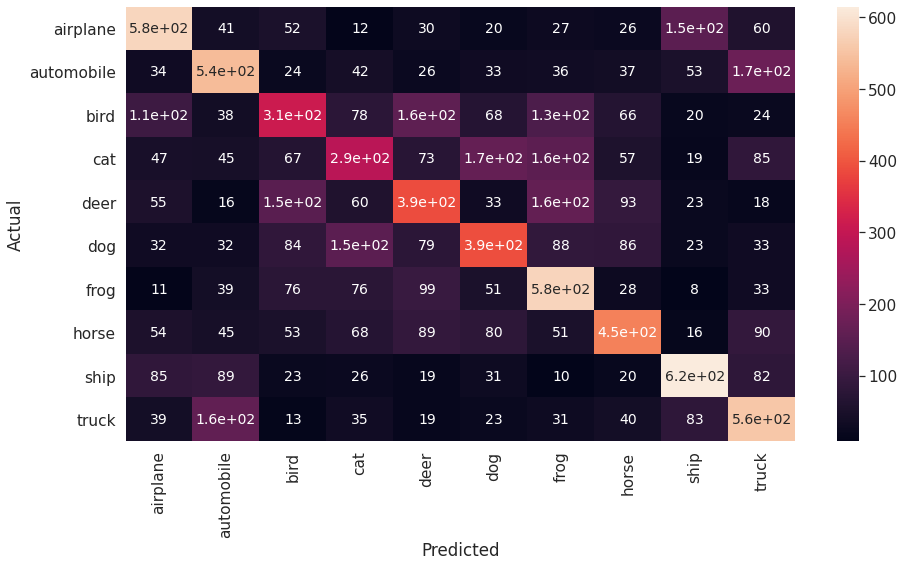

In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

array = confusion_matrix( test_labels,y_pred_test_rf)

df_cm = pd.DataFrame(array, range(10), range(10))
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, xticklabels=label_names, yticklabels=label_names,annot=True, annot_kws={"size": 14}) # font size
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

With PCA 

In [ ]:
from sklearn.metrics import accuracy_score
# rf = grid_search.best_estimator_
rf_pca=RandomForestClassifier(random_state=42)
rf_pca.fit(X_train_pca,train_labels)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
y_pred_test_rf_pca=rf_pca.predict(X_test_pca)
y_pred_train_rf_pca=rf_pca.predict(X_train_pca)

In [ ]:

print("Training Accuracy :",accuracy_score(train_labels, y_pred_train_rf_pca))
print("Testing Accuracy:",accuracy_score(test_labels, y_pred_test_rf_pca))
print(classification_report(test_labels,y_pred_test_rf_pca))

Training Accuracy : 1.0
Testing Accuracy: 0.287
              precision    recall  f1-score   support

           0       0.38      0.42      0.40      1000
           1       0.28      0.28      0.28      1000
           2       0.22      0.18      0.20      1000
           3       0.19      0.17      0.18      1000
           4       0.28      0.29      0.29      1000
           5       0.29      0.28      0.28      1000
           6       0.27      0.26      0.26      1000
           7       0.21      0.16      0.18      1000
           8       0.39      0.49      0.43      1000
           9       0.30      0.32      0.31      1000

    accuracy                           0.29     10000
   macro avg       0.28      0.29      0.28     10000
weighted avg       0.28      0.29      0.28     10000



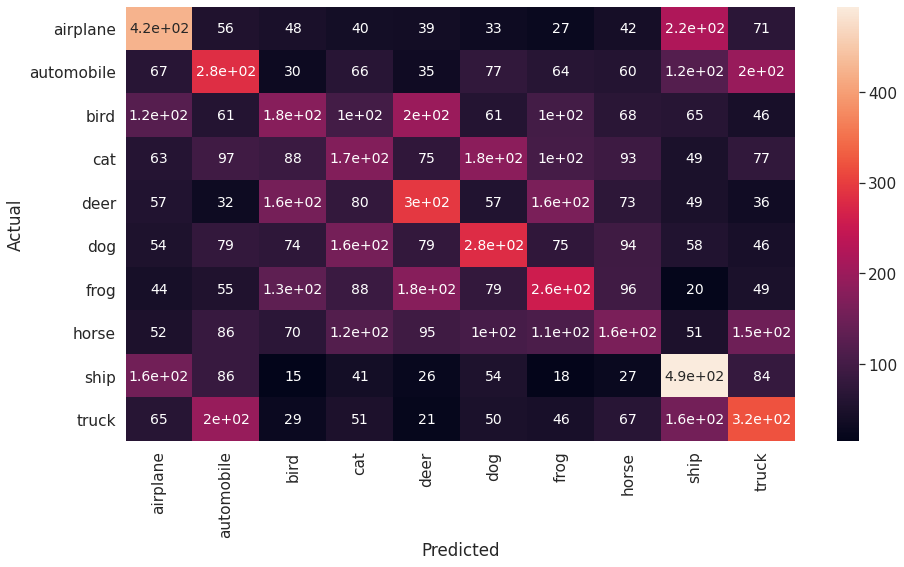

In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

array = confusion_matrix( test_labels,y_pred_test_rf_pca)

df_cm = pd.DataFrame(array, range(10), range(10))
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm,xticklabels=label_names, yticklabels=label_names, annot=True, annot_kws={"size": 14}) # font size
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.show()

### COMPARSION OF MODELS 

Without PCA

In [ ]:
from statistics import mean,stdev
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)

In [ ]:
models = [logisticRegr,gnb,rf]
scores=[]
for model in models :
   score1=cross_val_score(model, X_test, test_labels, scoring='accuracy', cv=skf, n_jobs=-1)
   scores.append(score1)








In [ ]:
print("Logistic Regression")
print("CVS accuracy Scores: %s"%(scores[0]))
print('Accuracy: Mean: %.3f , std deviation %.3f\n' % (mean(scores[0]), stdev(scores[0])))

print("Gaussian Naive Bayes")
print("CVS accuracy Scores: %s"%(scores[1]))
print('Accuracy: Mean: %.3f , std deviation %.3f\n' % (mean(scores[1]), stdev(scores[1])))

print("Random Forest")
print("CVS accuracy Scores: %s"%(scores[2]))
print('Accuracy: Mean: %.3f , std deviation %.3f\n' % (mean(scores[2]), stdev(scores[2])))

Logistic Regression
CVS accuracy Scores: [0.31   0.3255 0.3295 0.317  0.3205]
Accuracy: Mean: 0.321 , std deviation 0.008

Gaussian Naive Bayes
CVS accuracy Scores: [0.2855 0.287  0.297  0.295  0.3015]
Accuracy: Mean: 0.293 , std deviation 0.007

Random Forest
CVS accuracy Scores: [0.4025 0.4135 0.4175 0.4185 0.4135]
Accuracy: Mean: 0.413 , std deviation 0.006



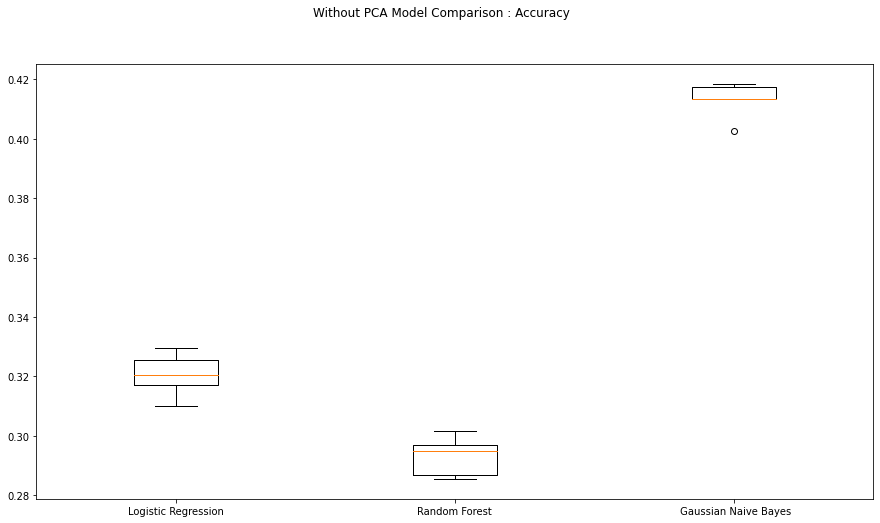

In [ ]:
from matplotlib import rcParams
fig = plt.figure()
fig.suptitle('Without PCA Model Comparison : Accuracy')
ax = fig.add_subplot()
plt.boxplot(scores)
ax.set_xticklabels(["Logistic Regression","Random Forest", " Gaussian Naive Bayes"])
rcParams['figure.figsize']= 15,8
plt.show()


With PCA

In [ ]:
models = [logisticRegr,gnb,rf]
scores_pca=[]
for model in models :
   score1=cross_val_score(model, X_test_pca, test_labels, scoring='accuracy', cv=skf, n_jobs=-1)
   scores_pca.append(score1)


In [ ]:
print("Logistic Regression")
print("CVS accuracy Scores: %s"%(scores_pca[0]))
print('Accuracy: Mean: %.3f , std deviation %.3f\n' % (mean(scores_pca[0]), stdev(scores_pca[0])))

print("Gaussian Naive Bayes")
print("CVS accuracy Scores: %s"%(scores_pca[1]))
print('Accuracy: Mean: %.3f , std deviation %.3f\n' % (mean(scores_pca[1]), stdev(scores_pca[1])))

print("Random Forest")
print("CVS accuracy Scores: %s"%(scores_pca[2]))
print('Accuracy: Mean: %.3f , std deviation %.3f\n' % (mean(scores_pca[2]), stdev(scores_pca[2])))

Logistic Regression
CVS accuracy Scores: [0.3685 0.3735 0.377  0.3755 0.3595]
Accuracy: Mean: 0.371 , std deviation 0.007

Gaussian Naive Bayes
CVS accuracy Scores: [0.2895 0.2925 0.3045 0.294  0.3015]
Accuracy: Mean: 0.296 , std deviation 0.006

Random Forest
CVS accuracy Scores: [0.367  0.361  0.362  0.3695 0.36  ]
Accuracy: Mean: 0.364 , std deviation 0.004



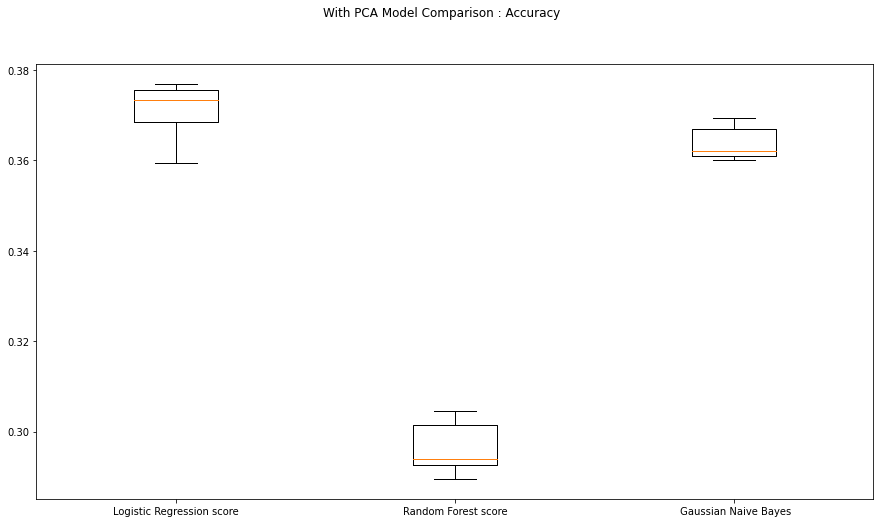

In [ ]:
fig = plt.figure()
fig.suptitle('With PCA Model Comparison : Accuracy')
ax = fig.add_subplot()
plt.boxplot(scores_pca)
ax.set_xticklabels(["Logistic Regression score","Random Forest score", " Gaussian Naive Bayes"])
rcParams['figure.figsize']= 15,8
plt.show()


### Neural Networks

### Without Data Augmentation 

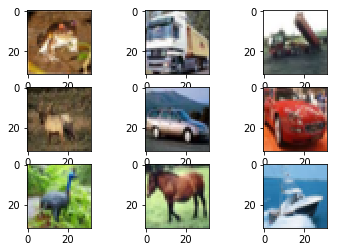

In [ ]:
#load data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
img_rows, img_cols , channels= 32,32,3
for i in range(0,9):
    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i])
plt.show()

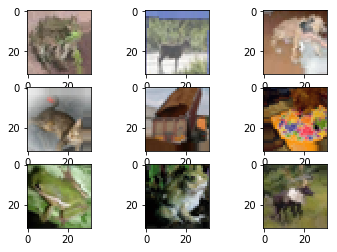

In [ ]:
# see example augmentation images
for X_batch, y_batch in datagen.flow(x_train, y_train, batch_size=9):
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].astype(np.uint8))
    plt.show()
    break

In [ ]:
#reshape into images
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, channels)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, channels)
input_shape = (img_rows, img_cols, 1)
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [ ]:
#convert integers to float; normalise and center the mean
x_train=x_train.astype("float32")  
x_test=x_test.astype("float32")
mean=np.mean(x_train)
std=np.std(x_train)
x_test=(x_test-mean)/std
x_train=(x_train-mean)/std

In [ ]:
# labels
num_classes=10
y_train = k.utils.to_categorical(y_train, num_classes)
y_test = k.utils.to_categorical(y_test, num_classes)

In [ ]:
# plotting helper function
def plothist(hist):
    plt.plot(hist.history['acc'])
    plt.plot(hist.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [ ]:
# build and compile the model  (roughly following the VGG paper)

#reg=l2(1e-4)   # L2 or "ridge" regularisation
reg=None
num_filters=32
ac='relu'
adm=Adam(lr=0.001,decay=0, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
opt=adm
drop_dense=0.5
drop_conv=0

class ImageClassificationBase(nn.Module):
    def training_step(self,batch):
        images,labels= batch
        out= self(images)  #Generate predictions
        loss= F.cross_entropy(out,labels) #calculate loss
        return loss
    
    def validation_step(self,batch):
        images, labels = batch
        out = self(images)  # Generate predictions
        loss= F.cross_entropy(out,labels) # calculate loss
        acc= accuracy(out,labels)
        return {'val_loss':loss.detach(), 'val_acc':acc}
    
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss= torch.stack(batch_losses).mean() # Stacking losses to combine losses and calculate average
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean() # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
        
    def epoch_end(self,epoch,result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))


class Cifar10CnnModel(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
        nn.Conv2D(num_filters, (3, 3), activation=ac, kernel_regularizer=reg, input_shape=(img_rows, img_cols, channels),padding='same'))
        nn.BatchNormalization(axis=-1))
        nn.Conv2D(num_filters, (3, 3), activation=ac,kernel_regularizer=reg,padding='same'))
        nn.BatchNormalization(axis=-1))
        nn.MaxPooling2D(pool_size=(2, 2)))   # reduces to 16x16x3xnum_filters
        model.add(Dropout(drop_conv))

        nn.Conv2D(2*num_filters, (3, 3), activation=ac,kernel_regularizer=reg,padding='same'))
        nn.BatchNormalization(axis=-1))
        nn.Conv2D(2*num_filters, (3, 3), activation=ac,kernel_regularizer=reg,padding='same'))
        nn.BatchNormalization(axis=-1))
        nn.MaxPooling2D(pool_size=(2, 2)))   # reduces to 8x8x3x(2*num_filters)
        nn.Dropout(drop_conv))

        nn.Conv2D(4*num_filters, (3, 3), activation=ac,kernel_regularizer=reg,padding='same'))
        nn.BatchNormalization(axis=-1))
        nn.Conv2D(4*num_filters, (3, 3), activation=ac,kernel_regularizer=reg,padding='same'))
        nn.BatchNormalization(axis=-1))
        nn.MaxPooling2D(pool_size=(2, 2)))   # reduces to 4x4x3x(4*num_filters)
        nn.Dropout(drop_conv))

        nn.Flatten())
        nn.(Dense(512, activation=ac,kernel_regularizer=reg))
        nn.BatchNormalization())
        nn.Dropout(drop_dense))
        nn.Dense(num_classes, activation='softmax'))

model = Cifar10CnnModel()
model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer=opt)

In [ ]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_36 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_37 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 16, 16, 64)        18496     
__________

In [ ]:
# training without augmentation
history=model.fit(x_train, y_train, batch_size=128, epochs=100, validation_data=(x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 105s 2ms/step - loss: 1.4918 - acc: 0.5133 - val_loss: 1.2996 - val_acc: 0.5478
Epoch 2/100
50000/50000 [==============================] - 73s 1ms/step - loss: 0.8839 - acc: 0.6890 - val_loss: 0.8540 - val_acc: 0.7108
Epoch 3/100
50000/50000 [==============================] - 71s 1ms/step - loss: 0.6853 - acc: 0.7616 - val_loss: 0.7038 - val_acc: 0.7577
Epoch 4/100
50000/50000 [==============================] - 71s 1ms/step - loss: 0.5741 - acc: 0.7990 - val_loss: 0.6799 - val_acc: 0.7748
Epoch 5/100
50000/50000 [==============================] - 71s 1ms/step - loss: 0.4838 - acc: 0.8305 - val_loss: 0.6797 - val_acc: 0.7764
Epoch 6/100
50000/50000 [==============================] - 71s 1ms/step - loss: 0.4058 - acc: 0.8572 - val_loss: 0.6821 - val_acc: 0.7831
Epoch 7/100
50000/50000 [==============================] - 71s 1ms/step - loss: 0.3400 - acc: 0.8816 - val_loss: 0.6651 -

50000/50000 [==============================] - 71s 1ms/step - loss: 0.0256 - acc: 0.9911 - val_loss: 1.1473 - val_acc: 0.8180
Epoch 60/100
50000/50000 [==============================] - 70s 1ms/step - loss: 0.0194 - acc: 0.9933 - val_loss: 1.1226 - val_acc: 0.8210
Epoch 61/100
50000/50000 [==============================] - 70s 1ms/step - loss: 0.0253 - acc: 0.9909 - val_loss: 1.1875 - val_acc: 0.8174
Epoch 62/100
50000/50000 [==============================] - 70s 1ms/step - loss: 0.0229 - acc: 0.9926 - val_loss: 1.1580 - val_acc: 0.8205
Epoch 63/100
50000/50000 [==============================] - 71s 1ms/step - loss: 0.0250 - acc: 0.9915 - val_loss: 1.1892 - val_acc: 0.8137
Epoch 64/100
50000/50000 [==============================] - 71s 1ms/step - loss: 0.0259 - acc: 0.9911 - val_loss: 1.1308 - val_acc: 0.8208
Epoch 65/100
50000/50000 [==============================] - 71s 1ms/step - loss: 0.0225 - acc: 0.9923 - val_loss: 1.1524 - val_acc: 0.8206
Epoch 66/100
50000/50000 [==============

In [ ]:
#training accuracy without dropout
train_acc=model.evaluate(x_train,y_train,batch_size=128)
train_acc

50000/50000 [==============================] - 23s 452us/step


[0.001993330870848149, 0.99939999999999996]

In [ ]:
model_test_acc=model.evaluate(x_test,y_test,batch_size=128)
model_test_acc

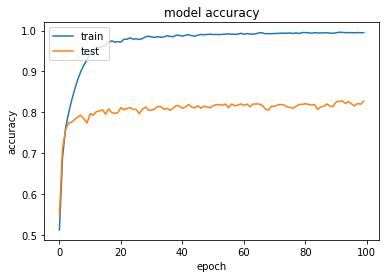

In [ ]:
plothist(history)

In [ ]:
#model.save('cifar10_01.h5')                  
#model=load_model('cifar10_01.h5')

### With Data Augmentation

In [ ]:
# build again, same model as model1

#reg=l2(1e-4)   # L2 or "ridge" regularisation
reg2=None
num_filters2=32
ac2='relu'
adm2=Adam(lr=0.001,decay=0, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
opt2=adm2
drop_dense2=0.5
drop_conv2=0




class Cifar10CnnModel(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.add(Conv2D(num_filters2, (3, 3), activation=ac2, kernel_regularizer=reg2, input_shape=(img_rows, img_cols, channels),padding='same')),
            nn.add(BatchNormalization(axis=-1)),
            nn.add(Conv2D(num_filters2, (3, 3), activation=ac2,kernel_regularizer=reg2,padding='same')),
            nn.add(BatchNormalization(axis=-1)),
            nn.add(MaxPooling2D(pool_size=(2, 2)),   # reduces to 16x16x3xnum_filters
            nn.add(Dropout(drop_conv2)),

            nn.add(Conv2D(2*num_filters2, (3, 3), activation=ac2,kernel_regularizer=reg2,padding='same')),
            nn.add(BatchNormalization(axis=-1)),
            nn.add(Conv2D(2*num_filters2, (3, 3), activation=ac2,kernel_regularizer=reg2,padding='same')),
            nn.add(BatchNormalization(axis=-1)),
            nn.add(MaxPooling2D(pool_size=(2, 2)),   # reduces to 8x8x3x(2*num_filters)

            nn.add(Dropout(drop_conv2)),
            nn.add(Conv2D(4*num_filters2, (3, 3), activation=ac2,kernel_regularizer=reg2,padding='same')),
            nn.add(BatchNormalization(axis=-1)),
            nn.add(Conv2D(4*num_filters2, (3, 3), activation=ac2,kernel_regularizer=reg2,padding='same')),
            nn.add(BatchNormalization(axis=-1)),
            nn.add(MaxPooling2D(pool_size=(2, 2)),   # reduces to 4x4x3x(4*num_filters)
            nn.add(Dropout(drop_conv2)),

            nn.add(Flatten()),
            nn.add(Dense(512, activation=ac2,kernel_regularizer=reg2)),
            nn.add(BatchNormalization()),
            nn.add(Dropout(drop_dense2)),
            nn.add(Dense(num_classes, activation='softmax')))


        
    def forward(self, xb):
        return self.network(xb)

model2 = Cifar10CnnModel()
model2.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer=opt2)


In [ ]:
# train with image augmentation
history2=model2.fit_generator(datagen.flow(x_train, y_train, batch_size=128),
                    steps_per_epoch = len(x_train) / 128, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
391/390 [==============================] - 106s 272ms/step - loss: 1.6073 - acc: 0.4661 - val_loss: 1.3294 - val_acc: 0.5226
Epoch 2/100
391/390 [==============================] - 71s 182ms/step - loss: 1.0941 - acc: 0.6148 - val_loss: 0.8888 - val_acc: 0.6878
Epoch 3/100
391/390 [==============================] - 71s 182ms/step - loss: 0.9122 - acc: 0.6787 - val_loss: 0.7557 - val_acc: 0.7307
Epoch 4/100
391/390 [==============================] - 70s 180ms/step - loss: 0.8082 - acc: 0.7150 - val_loss: 0.7181 - val_acc: 0.7479
Epoch 5/100
391/390 [==============================] - 71s 181ms/step - loss: 0.7442 - acc: 0.7393 - val_loss: 0.6809 - val_acc: 0.7643
Epoch 6/100
391/390 [==============================] - 71s 181ms/step - loss: 0.6942 - acc: 0.7544 - val_loss: 0.6384 - val_acc: 0.7817
Epoch 7/100
391/390 [==============================] - 71s 181ms/step - loss: 0.6465 - acc: 0.7752 - val_loss: 0.5781 - val_acc: 0.8008
Epoch 8/100
391/390 [==========================

Epoch 61/100
391/390 [==============================] - 69s 178ms/step - loss: 0.2121 - acc: 0.9261 - val_loss: 0.3299 - val_acc: 0.8972
Epoch 62/100
391/390 [==============================] - 69s 177ms/step - loss: 0.2107 - acc: 0.9250 - val_loss: 0.3235 - val_acc: 0.9022
Epoch 63/100
391/390 [==============================] - 69s 177ms/step - loss: 0.2028 - acc: 0.9281 - val_loss: 0.3272 - val_acc: 0.8979
Epoch 64/100
391/390 [==============================] - 69s 178ms/step - loss: 0.2044 - acc: 0.9288 - val_loss: 0.3256 - val_acc: 0.8989
Epoch 65/100
391/390 [==============================] - 69s 177ms/step - loss: 0.2003 - acc: 0.9295 - val_loss: 0.3353 - val_acc: 0.8943
Epoch 66/100
391/390 [==============================] - 69s 177ms/step - loss: 0.1975 - acc: 0.9299 - val_loss: 0.3303 - val_acc: 0.8991
Epoch 67/100
391/390 [==============================] - 70s 178ms/step - loss: 0.1987 - acc: 0.9305 - val_loss: 0.3282 - val_acc: 0.9004
Epoch 68/100
391/390 [===================

In [ ]:
model2.save('cifar10_02.h5')         #90.26, (128 batch, 0.001 lr, 512 neurons, no zoom, no convdrop, only 0.1 shift) 

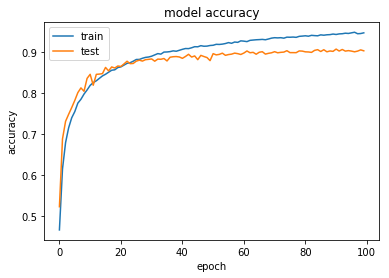

In [ ]:
plothist(history2)  # 128 batch, 0.001 lr, 512 neurons, no zoom, no convdrop, only 0.1 shift

In [ ]:
model2_test_acc=model2.evaluate(x_test,y_test,batch_size=128)
model2_test_acc

10000/10000 [==============================] - 4s 436us/step


[0.34665883693695071, 0.90259999999999996]

In [ ]:
model2_train_acc=model2.evaluate(x_train,y_train,batch_size=128)
model2_train_acc

50000/50000 [==============================] - 21s 416us/step


[0.046460947413444517, 0.98502000003814694]

### DEMO FOR THE CIFAR 10

In [ ]:
from keras.models import load_model
model=load_model('cifar10_02.h5')


In [ ]:
from PIL import Image 
from tensorflow.keras.preprocessing import image 
from IPython.display import display
import IPython.display 
import numpy as np

In [ ]:
path=r"/content/truck.jpg"

In [ ]:
classes = ['airplane', 'automobile', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
def predict(img):
    img = img.resize((32, 32), Image.ANTIALIAS)
    img = img.convert('RGB')
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0) / 255.
    preds = model.predict(x)[0]
    return {classes[x]: float(preds[x]) for x in np.argsort(preds)[::-1][:3]}
    # print(preds)


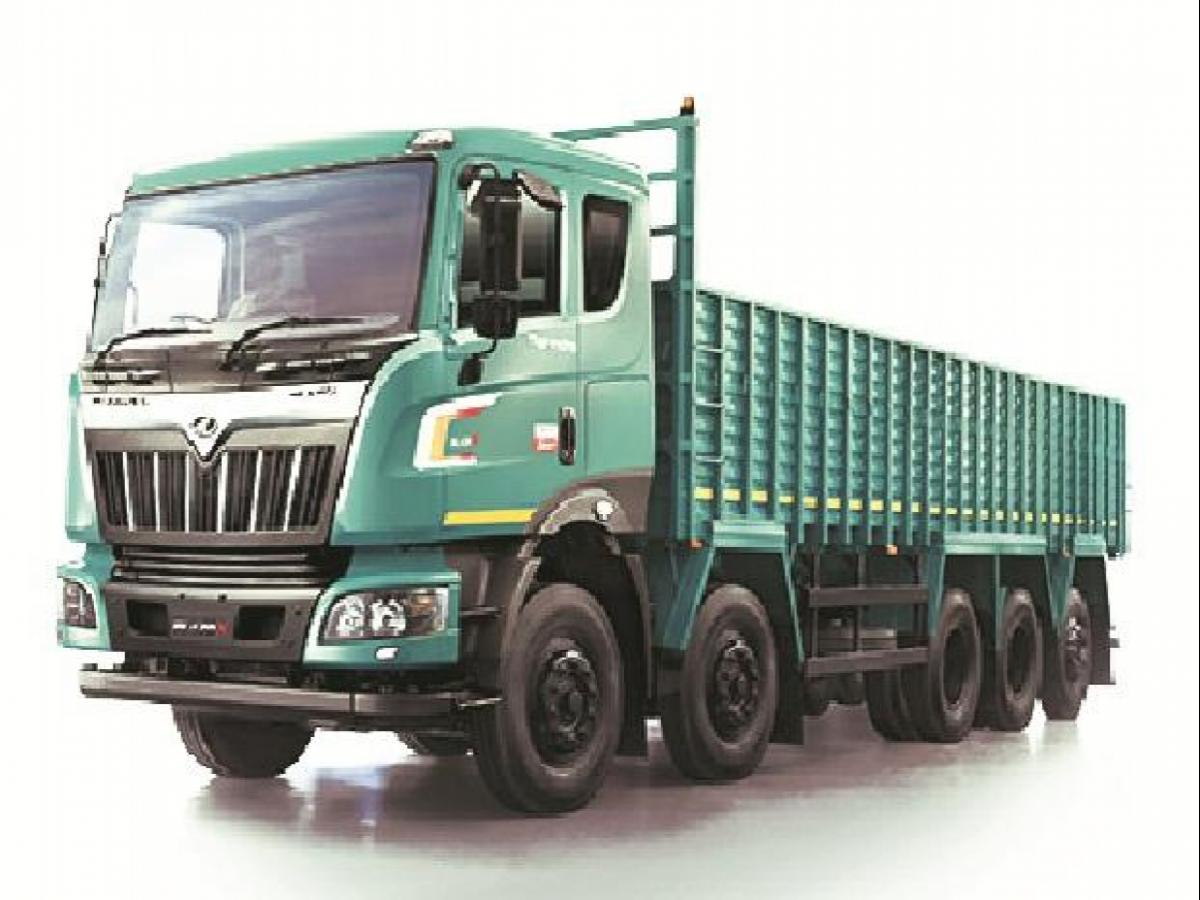

In [ ]:
display(IPython.display.Image(path))

In [ ]:
img=Image.open(path)
print(predict(img))

{'truck': 0.9978635907173157, 'automobile': 0.002136397873982787, 'cat': 8.007241802943099e-08}
